#### Amazinum. Lesson 14. Anomaly. Moisei

1. По даному датасеті видно, що Sklearn: EllipticEnvelope краще справляється із "фільтрацією", ніж Gaussian Distribution. При цьому фільтрація виконується лише наче в певній точці площини.
2. Якщо ж застосовувати DBScan, тоді видно, що фільтрація (предікт) виконується вже наче по всіх даних датасету.

#### Load make_blobs

#### Multivariate Gaussian Distribution

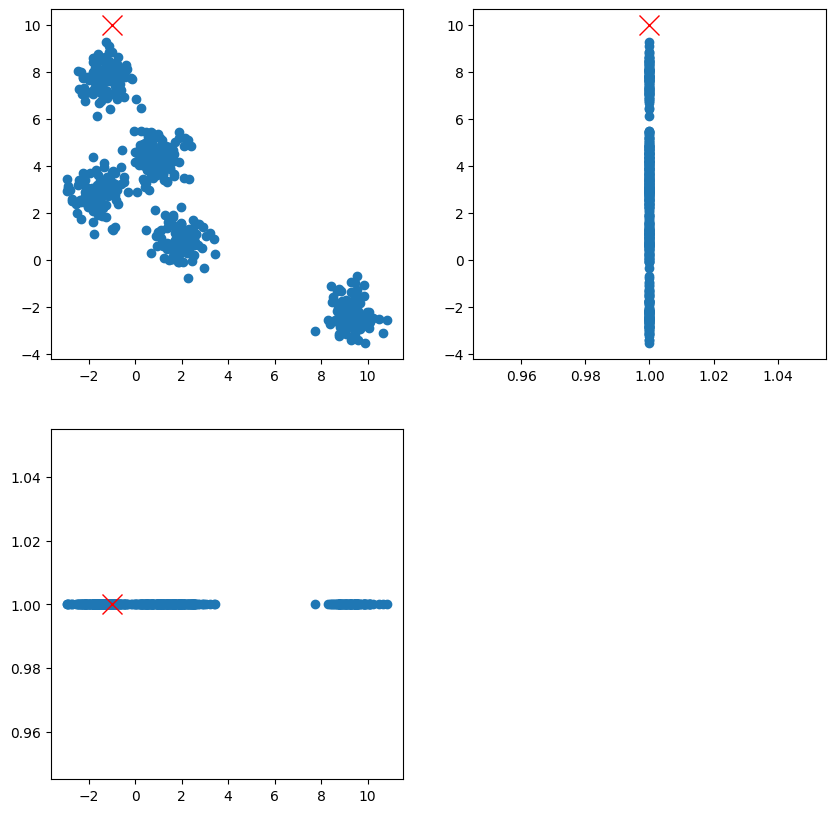

In [280]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

np.random.seed(0)
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 0.6, random_state = 0)

plt.figure (figsize=(10,10))
ax = plt.subplot(2,2,1)
ax.scatter(X[:,0], X[:,1])
ax.plot (-1, 10, 'rx', markersize= '15')
ax = plt.subplot(2,2,3)
ax.scatter( X[:,0],[1]*len(X[:,0]))
ax.plot (-1,1,'rx', markersize= '15')
ax = plt.subplot(2,2,2)
ax.scatter([1]*len(X[:,1]), X[:,1])
ax.plot (1,10,'rx', markersize= '15')

#### Implementation

Add outlier to dataset

In [281]:
np.c_[X[:,0], X[:,1]]
outlier= np.array([-1,10]).reshape(1,-1)
X= np.r_[np.c_[X[:,0], X[:,1]], outlier]
X_demo= X.copy()
X[-5:, :]

array([[-0.04749204,  5.47425256],
       [-2.69798647,  2.52194722],
       [-1.85948979,  2.63549967],
       [ 2.40615694,  4.87047502],
       [-1.        , 10.        ]])

Associate normal distribution for each feature

In [282]:
from scipy.stats import norm

mu = np.zeros(X.shape[1])
std= np.zeros(X.shape[1])
p = np.zeros(X.shape)
for i in range (X.shape[1]):
    mu[i]=  X[:,i].mean()
    std[i]= X[:,i].std()
    p[:,i]= norm.pdf(X[:,i], mu[i], std[i])

print  ('np.shape=', p.shape)
print  ('p[:5,:]=\n', p[:5,:])

np.shape= (501, 2)
p[:5,:]=
 [[0.09894224 0.08402921]
 [0.09281553 0.10414657]
 [0.1000098  0.08987002]
 [0.06988836 0.1150476 ]
 [0.09311403 0.11373144]]


Compute probability for each record of dataset using assiciated normal distribution

In [283]:
p_anomaly = np.prod(p, axis=1)
print  ('p_anomaly.shape=', p_anomaly.shape)
print  ('p_anomaly[:5]=\n', p_anomaly[:5])

p_anomaly.shape= (501,)
p_anomaly[:5]=
 [0.00831404 0.00966642 0.00898788 0.00804049 0.01058999]


Label outliers

In [284]:
import pandas as pd 

In [285]:
def get_anomalies(p_anomaly):
    res = []
    for eps in np.linspace(p_anomaly.min(), p_anomaly.max(), 100):
        anomalies= np.where (p_anomaly< eps)[0] # it returns tuple thus it requires to take first element or use 
        regular= np.where (p_anomaly>=eps)[0]
        n_anomalies= len(p_anomaly[anomalies])
        res.append([eps,n_anomalies, anomalies, regular])
    df = pd.DataFrame(res, columns = ['eps', 'n_anomalies', 'anomalies', 'regular']).head(10)
    return df
df = get_anomalies(p_anomaly)
df

,eps,n_anomalies,anomalies,regular
0,0.000238,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,0.000352,4,"[183, 393, 441, 495]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,0.000466,17,"[17, 21, 46, 54, 119, 183, 185, 210, 313, 318,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,0.000580,26,"[17, 21, 37, 46, 54, 114, 119, 126, 183, 185, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,0.000694,46,"[17, 21, 37, 38, 46, 54, 86, 114, 119, 126, 13...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,0.000808,63,"[5, 17, 21, 37, 38, 46, 54, 61, 86, 94, 114, 1...","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
6,0.000922,79,"[5, 15, 17, 21, 37, 38, 41, 46, 51, 54, 61, 73...","[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,0.001036,90,"[5, 7, 15, 17, 21, 37, 38, 39, 41, 46, 51, 54,...","[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 1..."
8,0.001150,93,"[5, 7, 15, 17, 21, 37, 38, 39, 41, 46, 51, 54,...","[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 1..."
9,0.001264,97,"[5, 7, 15, 17, 21, 37, 38, 39, 41, 46, 51, 54,...","[0, 1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 1..."


#### Visualize outliers

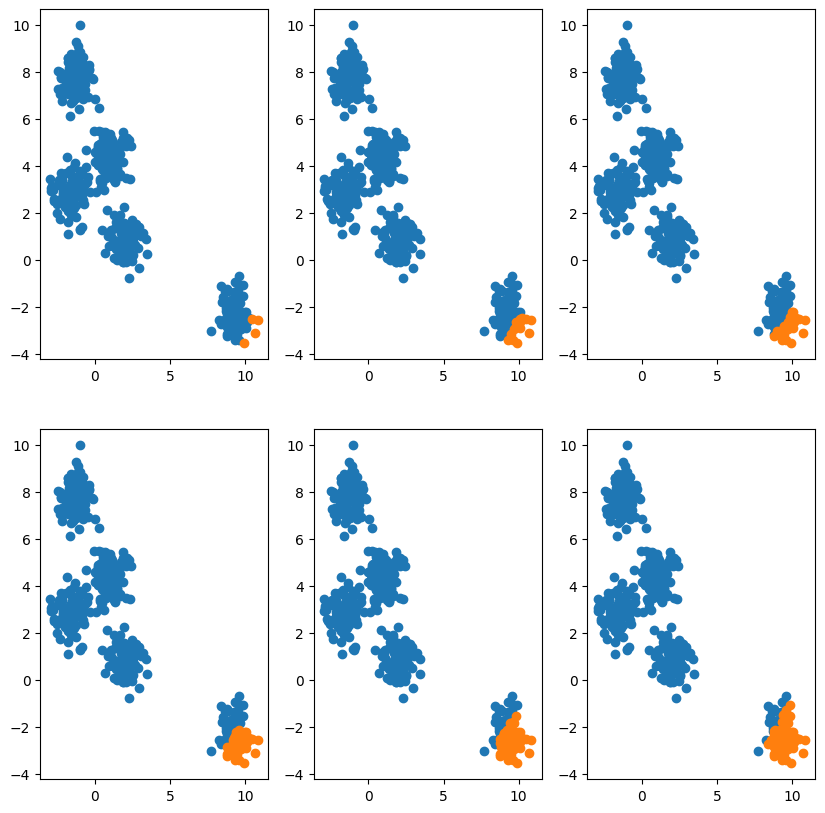

In [286]:
plt.figure (figsize=(10,10))
for i in range (1,7): # skip case of no outliers 
    ax = plt.subplot(2,3,i)
#     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i,3]]
    ax.scatter(regulars[:,0],regulars[:,1])
    outliers = X[df.iloc[i,2]]
    ax.scatter (outliers[:,0],outliers[:,1])# ,marker='x',s=80, c='r',alpha=0.6)

Implement anomaly detection using multivariate normal distribution

In [287]:
mu_mv= X.mean(axis=0)
print ('mu_mv.shape=',mu_mv.shape)
m = X.shape[0]
def compute_sigma_mv(x):
    res = np.zeros((x.shape[1],x.shape[1]))
    for i in range(x.shape[0]):
        res += x[i,:].reshape(1,-1).T * x[i,:].reshape(1,-1)
    return res/     x.shape[0]
sigma_mv= compute_sigma_mv(X)
print ('sigma_mv.shape=',sigma_mv.shape)
print ('sigma_mv:\n',sigma_mv)


# probably this may or even should be used: 
print ('\nUsing np.cov to compare')
cov = np.cov((X-mu_mv),rowvar= False ) # If `rowvar` is True (default), then each row represents a    variable, with observations in the columns. Otherwise, the relationshipis transposed: each column rep
print ('cov.shape=',sigma_mv.shape)
cov


mu_mv.shape= (2,)
sigma_mv.shape= (2, 2)
sigma_mv:
 [[19.35351096 -5.98937962]
 [-5.98937962 19.16484599]]

Using np.cov to compare
cov.shape= (2, 2)


array([[ 15.94255844, -11.06099134],
       [-11.06099134,  11.78218663]])

In [288]:
from scipy.stats import multivariate_normal 
p_mutlivar = multivariate_normal.pdf(X, mean=mu, cov=sigma_mv)
p_mutlivar

array([0.00710583, 0.00787772, 0.00728327, 0.00642316, 0.00818234,
       0.00177409, 0.00804428, 0.00194836, 0.00797048, 0.00816128,
       0.00372054, 0.00556634, 0.00811985, 0.00357677, 0.00643037,
       0.00195309, 0.00701905, 0.00135949, 0.00819996, 0.00476358,
       0.00748963, 0.00131663, 0.00624309, 0.00717279, 0.00695859,
       0.00389465, 0.00789141, 0.00812085, 0.00440379, 0.00515186,
       0.00810428, 0.00754776, 0.00815602, 0.00334343, 0.00794735,
       0.00788158, 0.00806452, 0.00136675, 0.00154474, 0.00199738,
       0.00330464, 0.00179789, 0.00660279, 0.00606472, 0.00781788,
       0.00833782, 0.00127799, 0.00833626, 0.00786686, 0.00429346,
       0.0074928 , 0.00187481, 0.00743136, 0.00680055, 0.00123187,
       0.00847246, 0.00184205, 0.00241147, 0.00457499, 0.00604833,
       0.00728621, 0.00169358, 0.00772739, 0.00697492, 0.00755692,
       0.00396539, 0.00754794, 0.00386509, 0.0081713 , 0.00778391,
       0.0079871 , 0.00720934, 0.00679846, 0.00197869, 0.00840

In [289]:
df = get_anomalies(p_mutlivar)
df

,eps,n_anomalies,anomalies,regular
0,0.000882,0,[],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,0.000961,2,"[183, 441]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
2,0.001039,2,"[183, 441]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
3,0.001118,4,"[183, 393, 441, 495]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
4,0.001196,6,"[183, 393, 395, 420, 441, 495]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
5,0.001274,11,"[54, 119, 183, 185, 210, 318, 393, 395, 420, 4...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
6,0.001353,17,"[21, 46, 54, 114, 119, 183, 185, 210, 318, 326...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
7,0.001431,21,"[17, 21, 37, 46, 54, 114, 119, 183, 185, 210, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
8,0.001510,24,"[17, 21, 37, 46, 54, 86, 114, 119, 183, 185, 2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
9,0.001588,35,"[17, 21, 37, 38, 46, 54, 86, 114, 119, 126, 17...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


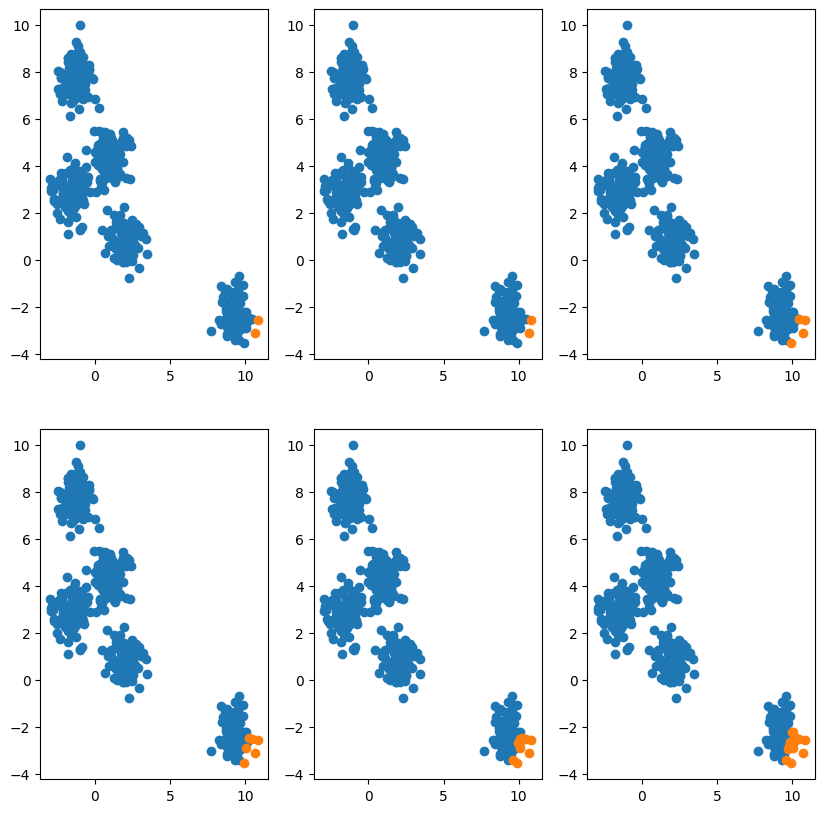

In [290]:
plt.figure (figsize=(10,10))
for i in range (1,7): # skip case of no outliers 
    ax = plt.subplot(2,3,i)
#     ax.scatter(X[:,0],X[:,1])
    regulars = X[df.iloc[i,3]]
    ax.scatter(regulars[:,0],regulars[:,1])
    outliers = X[df.iloc[i,2]]
    ax.scatter (outliers[:,0],outliers[:,1])# ,marker='x',s=80, c='r',alpha=0.6)

#### Sklearn: EllipticEnvelope

In [291]:
from sklearn.covariance import EllipticEnvelope

algorithm = EllipticEnvelope(random_state=2022).fit(X)
y_pred = algorithm.predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1

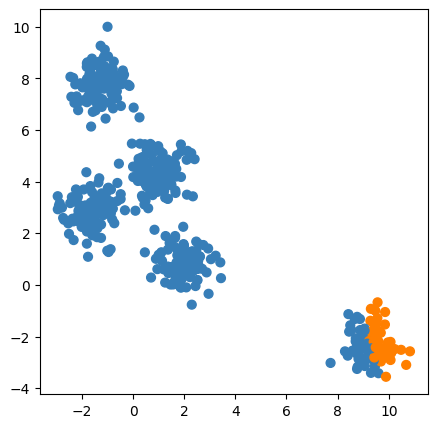

In [292]:
plt.figure (figsize=(5,5))
colors = np.array(['#377eb8' , '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred - 1) // 2])

Review for various outliers_fraction values¶

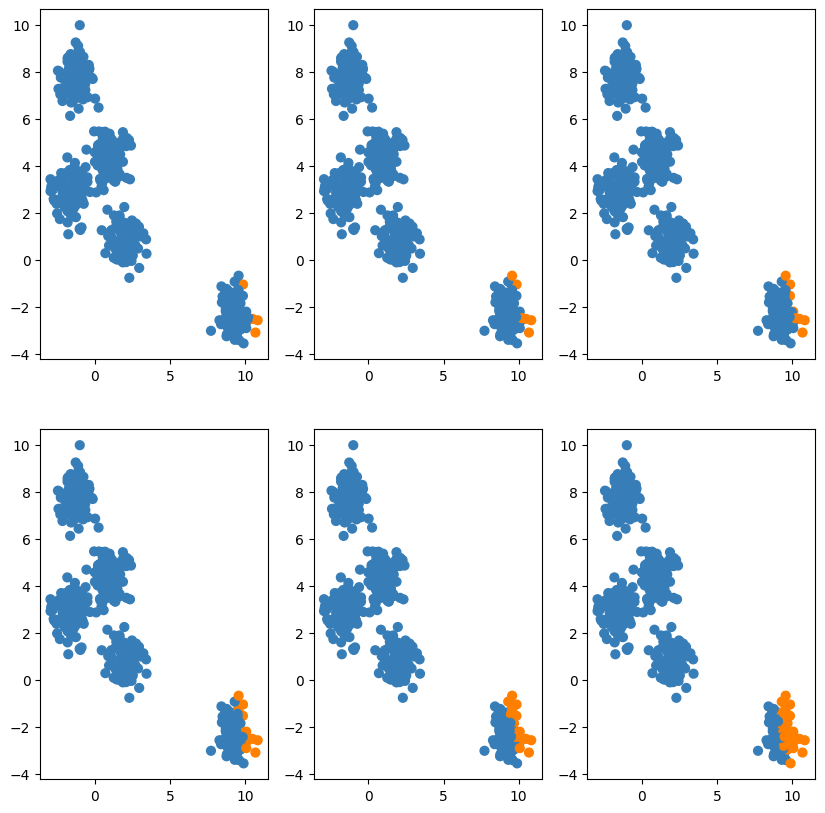

In [293]:
plt.figure (figsize=(10,10))

outliers_fraction= [.007, .01,.02, .03, .05, .1]
for i, of in  enumerate (outliers_fraction):  

    ax = plt.subplot(2,3,i+1)

    algorithm = EllipticEnvelope(contamination=of, random_state=2021).fit(X)
    y_pred = algorithm.predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], s=40, color=colors[(y_pred -1) // 2])

#### Applying noise

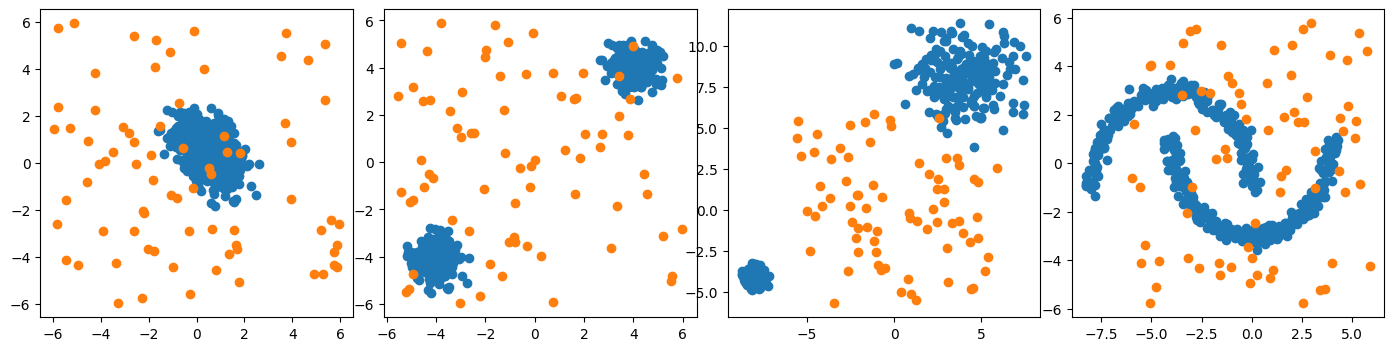

In [294]:
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

n_samples = 500
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 1], [1, 0]], cluster_std=0.6,
               **blobs_params)[0],
    make_blobs(centers=[[4, 4], [-4, -4]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[4, 8], [-8, -4]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([1.0, 0.25]))]

rng = np.random.RandomState(84)

_, subaxes = plt.subplots(1, 4, figsize=(14,4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets ):
    outliers =rng.uniform(low=-6, high=6,size=(n_outliers, 2))
    ax.scatter(X[:,0],X[:,1])
    ax.scatter(outliers[:,0],outliers[:,1])

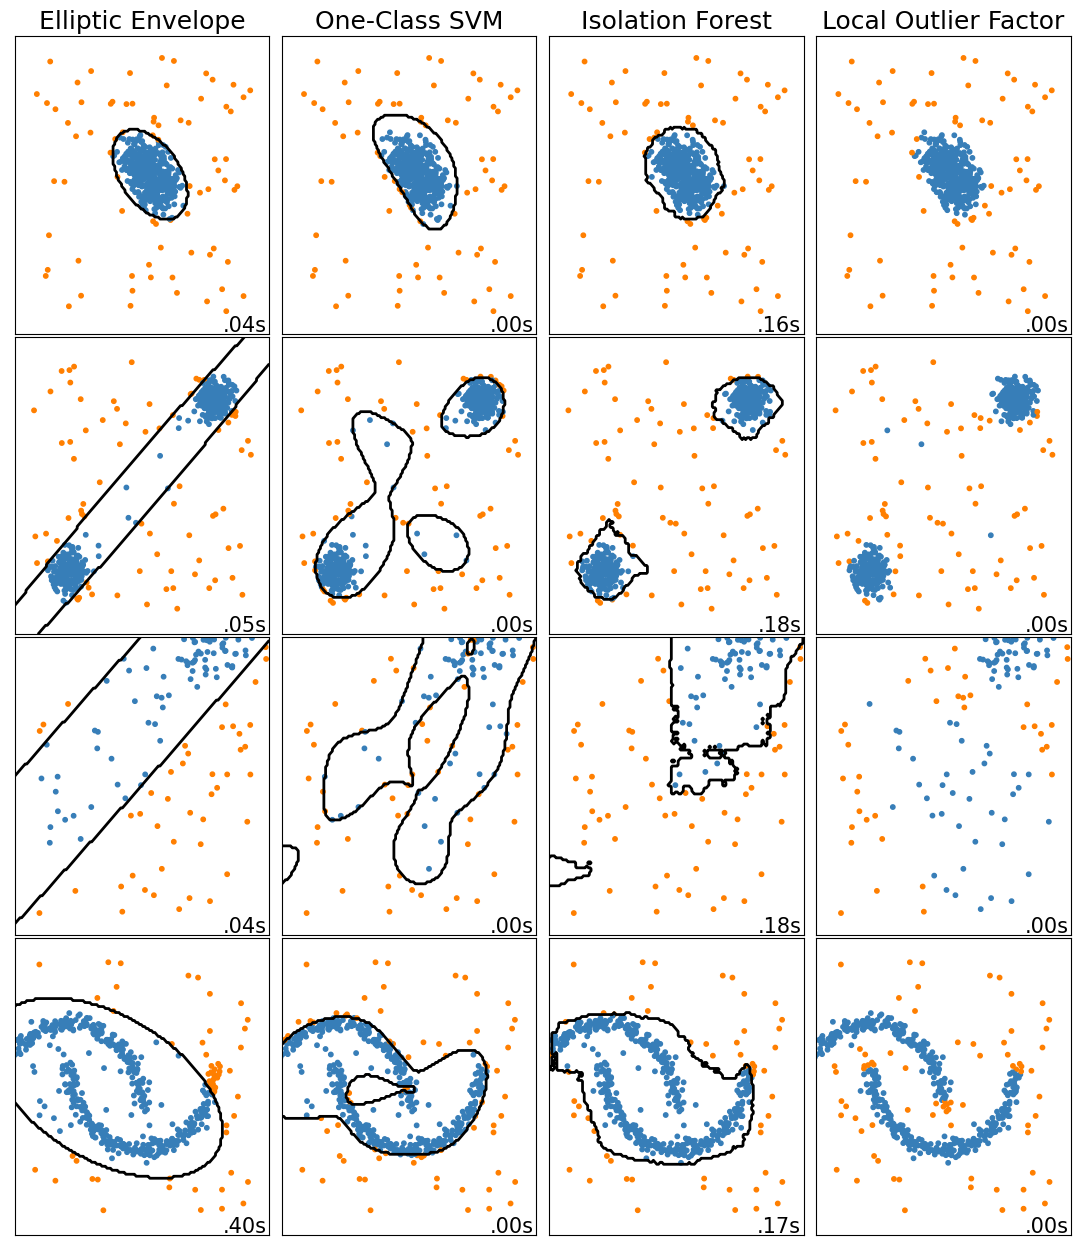

In [295]:
import time


# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Elliptic Envelope", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Use meshgrid data to draw the decision bondary
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

#         plot the decision bondary
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')


        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred - 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1



#### Classify unseen data with DBSCAN

In [296]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X= scaler.fit_transform(X_demo)

from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.05)
dbscan.fit(X)
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

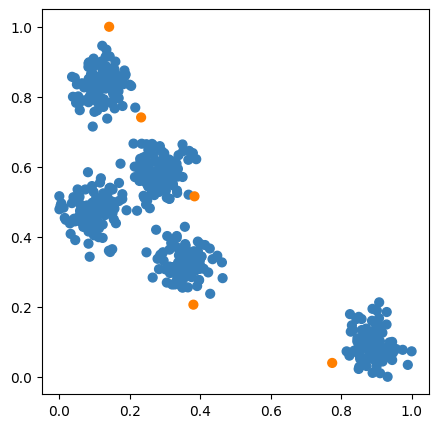

In [297]:
plt.figure (figsize=(5,5))
outliers= np.where(dbscan.labels_==-1, 1,0)
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[outliers])

Review DBSCAN for other datasets

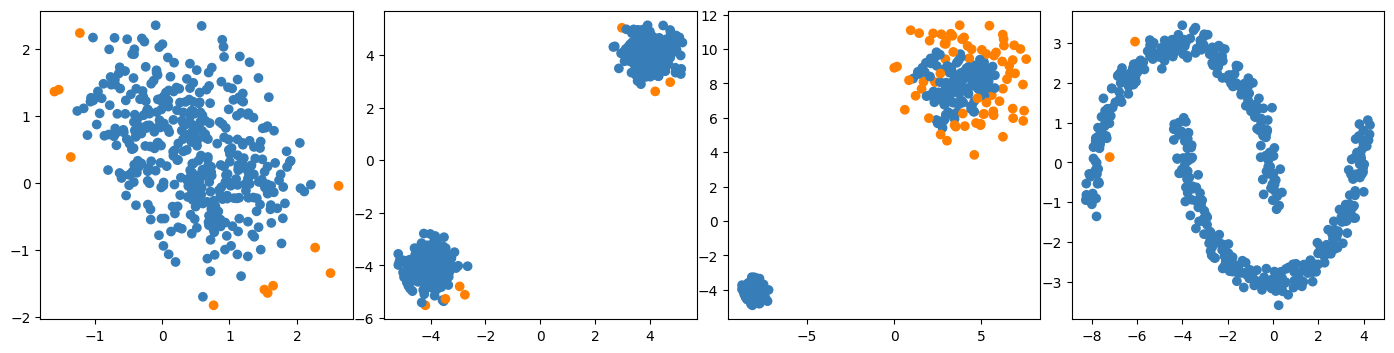

In [298]:
_, subaxes = plt.subplots(1, 4, figsize=(14,4))
# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,hspace=.01)
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets):
    dbscan = DBSCAN(eps=0.4, min_samples=5).fit(X)
    outliers= np.where(dbscan.labels_==-1, 1,0)    
    ax.scatter(X[:,0],X[:,1], color=colors[outliers])

Predict using DBSCAN

In [299]:
X= datasets[3]

from sklearn.cluster import DBSCAN 
eps_target=0.3
dbscan = DBSCAN(eps=eps_target).fit(X)

set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

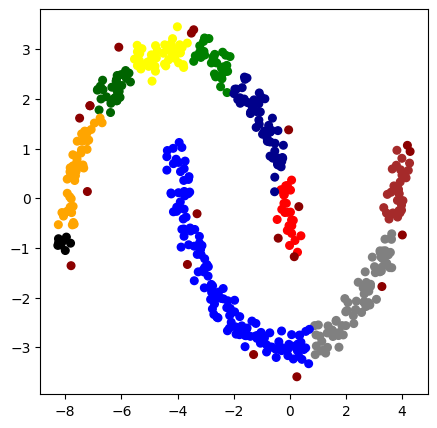

In [300]:
plt.figure (figsize=(5,5))
colors6 = np.array(['green','blue','grey', 'brown', 'yellow', 'orange', 'darkgreen', 'darkblue', 'black', 'red', 'darkred'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])

In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# core_sample_indices_ : array, shape = [n_core_samples] Indices of core samples.
# components_ : array, shape = [n_core_samples, n_features] Copy of each core sample found by training.

knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
X_new = np.array([[-0.2, 0], [0, 1], [1.2, -0.5], [4, 2], [-1, -6], [-6, 5]])
prediction= knn.predict(X_new)
prediction

array([9, 7, 9, 3, 1, 4], dtype=int64)

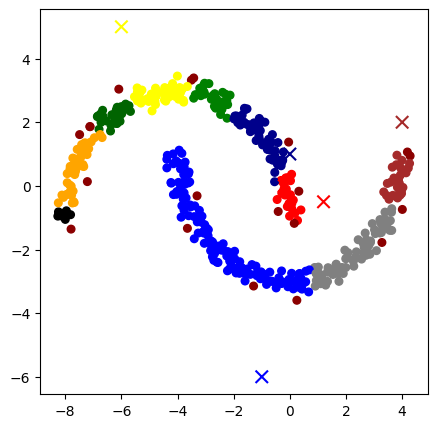

In [302]:
plt.figure (figsize=(5,5))
colors6 = np.array(['green','blue','grey', 'brown', 'yellow', 'orange', 'darkgreen', 'darkblue', 'black', 'red', 'darkred'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors6[dbscan.labels_])
plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker= 'x', color=colors6[prediction])

Sanity Check

In [303]:
outliers= X[dbscan.labels_==-1]
outliers

array([[ 0.31976294, -0.16948189],
       [-6.09279743,  3.03990509],
       [-7.11689392,  1.86142199],
       [ 4.28364064,  0.94086423],
       [-3.6490455 , -1.33455492],
       [ 4.00662547, -0.74072708],
       [-0.41473714, -0.80537594],
       [ 0.15692925, -1.17831143],
       [-7.12336787,  1.86189323],
       [ 0.24919241, -3.59578505],
       [-3.42467713,  3.39138178],
       [-3.50711653,  3.32334647],
       [-1.29163528, -3.14822255],
       [ 4.18704585,  1.06402884],
       [-7.79359398, -1.35899871],
       [-7.48869012,  1.61184608],
       [-7.21270115,  0.13397948],
       [ 3.27935416, -1.77897807],
       [-0.04331042,  1.37579734],
       [-3.30598465, -0.31299851]])

In [304]:
y_dist, y_pred_idx = knn.kneighbors(outliers, n_neighbors=1)
y_dist

array([[0.31887962],
       [0.52947076],
       [0.38140472],
       [0.32419825],
       [0.39888645],
       [0.39635982],
       [0.36029707],
       [0.32764732],
       [0.38449305],
       [0.37926275],
       [0.38873401],
       [0.39246955],
       [0.33422015],
       [0.32698087],
       [0.36756087],
       [0.31812001],
       [0.49091916],
       [0.30614562],
       [0.55562774],
       [0.37901603]])

In [305]:
y_dist>eps_target

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Classify unseen data

In [306]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_dist

array([[0.06836361],
       [0.32072818],
       [1.07572841],
       [1.19715369],
       [2.83948167],
       [2.00193505]])

In [307]:
new_y_pred = np.where(y_dist > eps_target, 1, 0).ravel()
new_y_pred

array([0, 1, 1, 1, 1, 1])

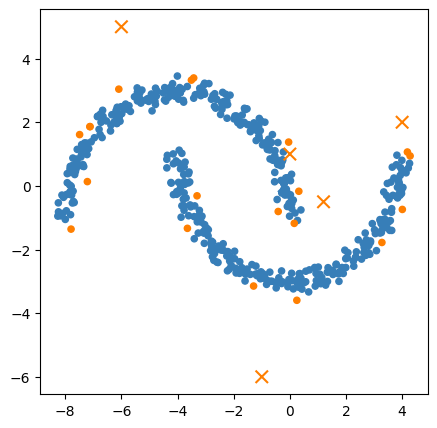

In [308]:
plt.figure (figsize=(5,5))
outliers= np.where(dbscan.labels_==-1, 1,0)
plt.scatter(X[:, 0], X[:, 1], s=20, color=colors[outliers])

plt.scatter(X_new[:, 0], X_new[:, 1], s=80, marker= 'x', color=colors[new_y_pred])

#### Visual method to detect outliers

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

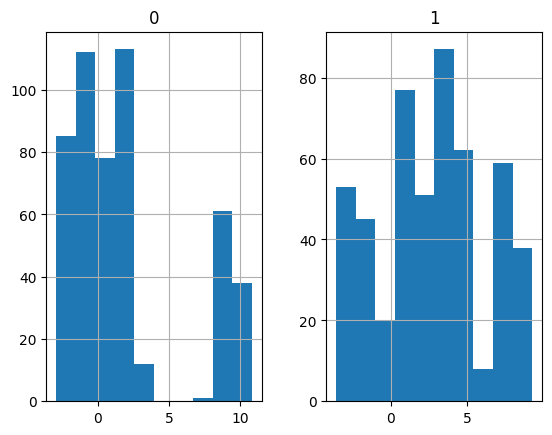

In [318]:
import seaborn as sns

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std = 0.6, random_state = 0)

# from  scipy import stats
# stats.describe(X)

pd.DataFrame(X).iloc[:,0].describe()
pd.DataFrame(X).hist()

<AxesSubplot:>

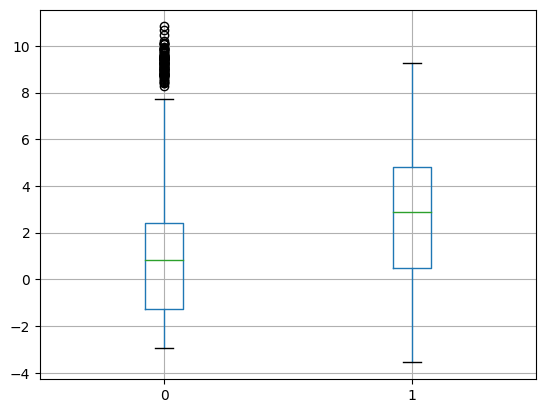

In [319]:
pd.DataFrame(X).boxplot()

<AxesSubplot:>

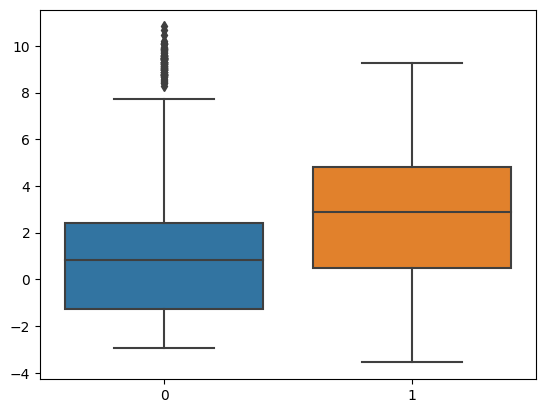

In [320]:
sns.boxplot(X)

<AxesSubplot:>

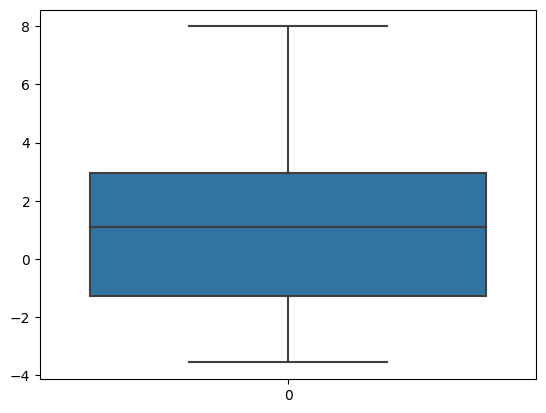

In [321]:
X = X[(X < 8) & (X > -8)]
sns.boxplot(X)